In [1]:
%pip install git+https://gitlab.com/moskalenkoviktor/ml_validation -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import locale

import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt

from ml_validation import database
from ml_validation.augmentations import (GaussianNoise, Inversion,
                                         RandomMasking, RandomScaling,
                                         TimeInversion, TimeWarp)
from ml_validation.experiment import ptbxl

In [3]:
locale.setlocale(locale.LC_ALL, "")
path_dataset = "datasets"
task_type = "superclasses"
sample_rate = 500

In [4]:
database.download(database.Type.PTB_XL, path_dataset)
experiment = ptbxl.start_experiment(
    "Moskalenko Viktor", path_dataset, task_type=task_type
)

Archive already exists: datasets/ptb_xl.zip


In [5]:
X, Y = experiment.get_data()
X_sample, Y_sample = X[0], Y[0]

In [6]:
seed = 42

In [7]:
def plot_ecg_augmentation(X_original: npt.NDArray[np.float32], X_augmented: npt.NDArray[np.float32]) -> None:
    plt.figure(figsize=(20, 20))
    C = X_original.shape[0]
    for i in range(C):
        plt.subplot(C, 2, 2 * i + 1)
        if i == 0:
            plt.title("Original")
        plt.plot(X_original[i])
    for i in range(C):
        plt.subplot(C, 2, 2 * i + 2)
        if i == 0:
            plt.title("Augmented")
        plt.plot(X_augmented[i])

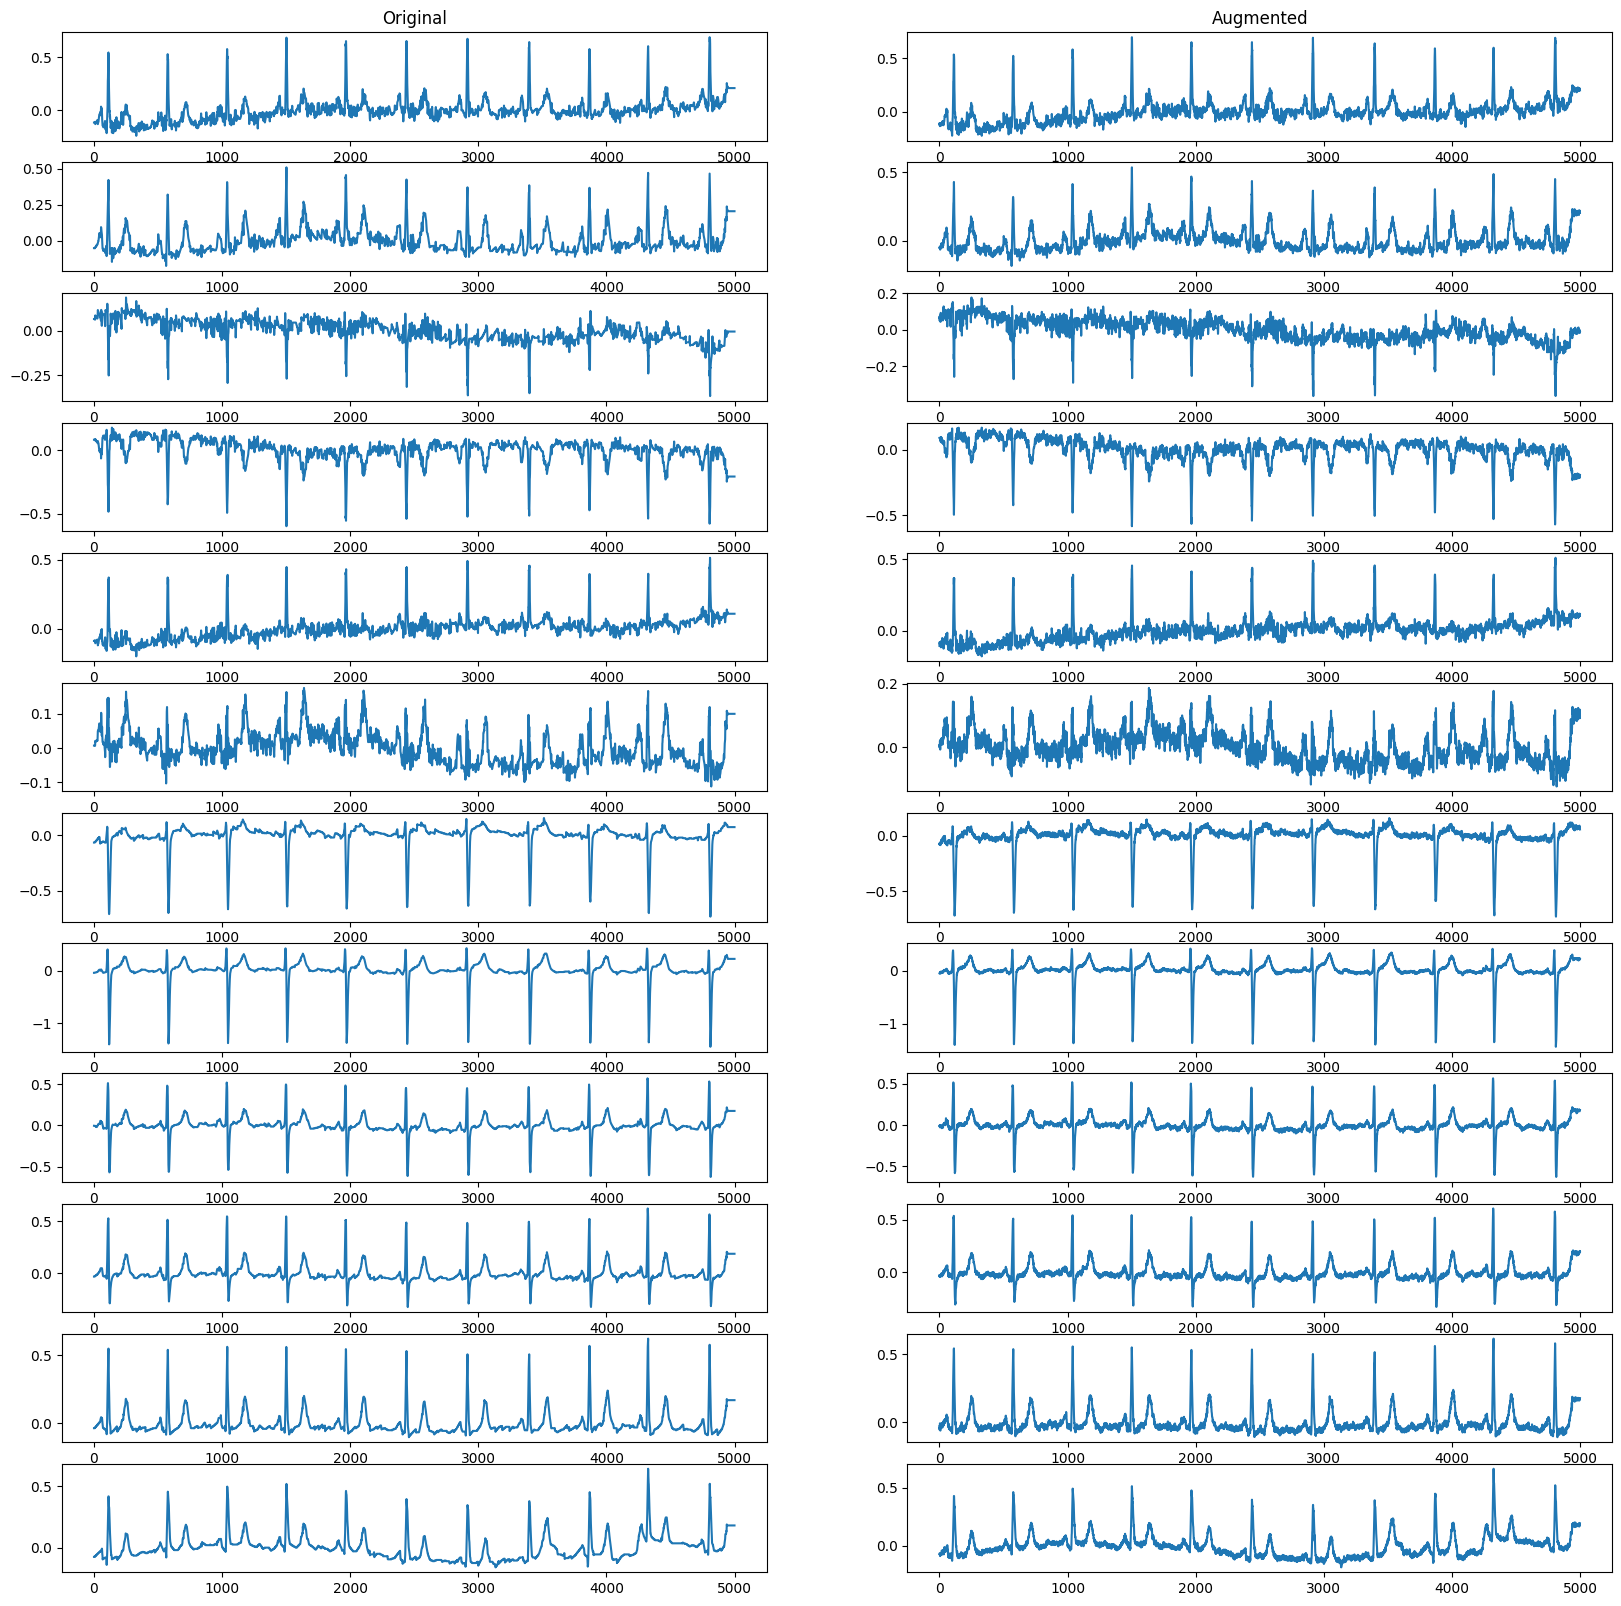

In [8]:
X_augmented = GaussianNoise(scale=0.01, seed=seed)(X_sample)
plot_ecg_augmentation(X_sample, X_augmented)

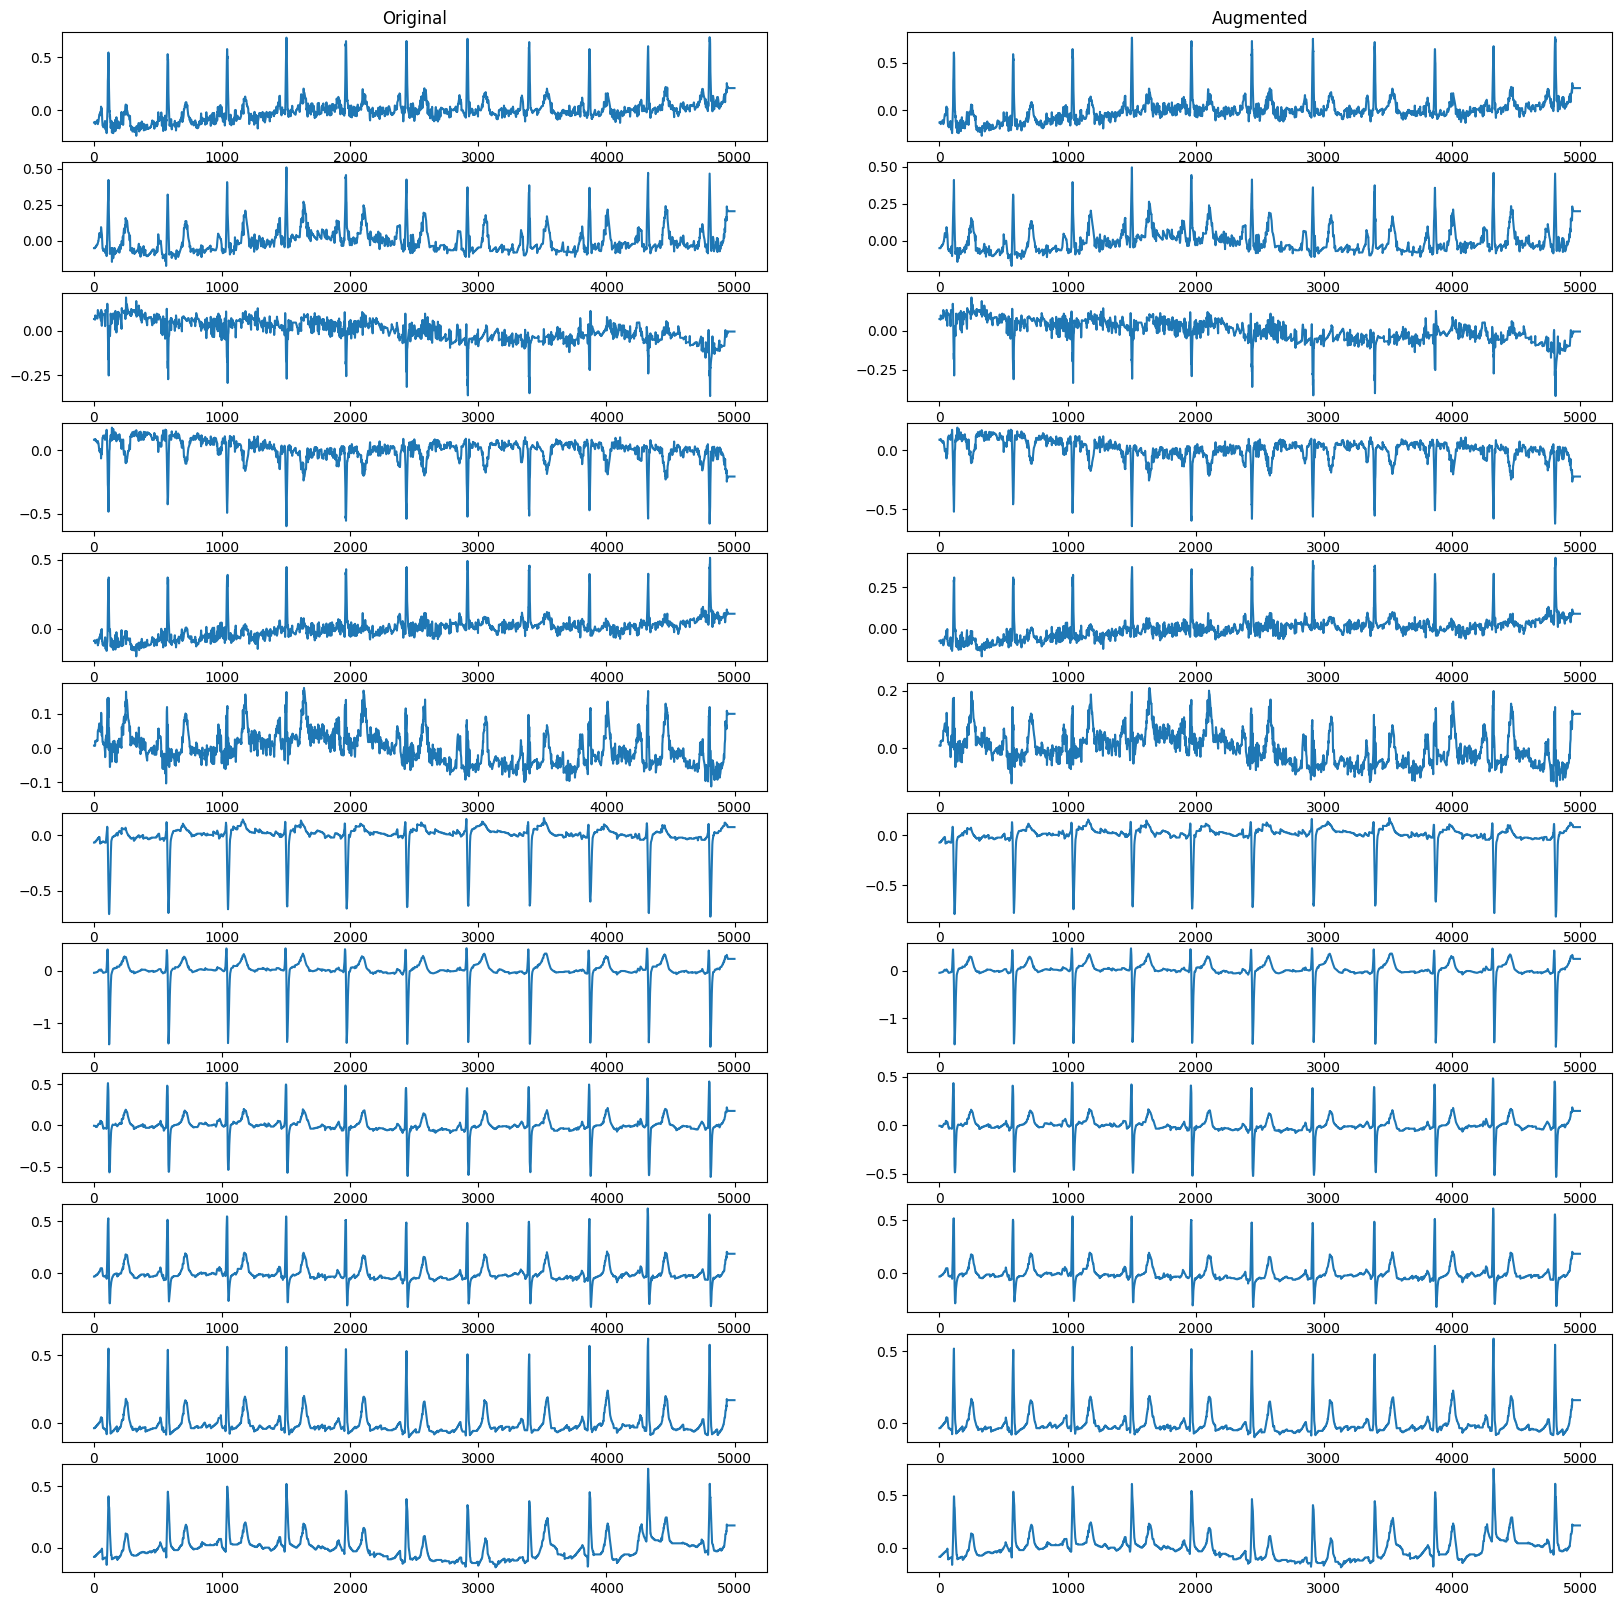

In [9]:
X_augmented = RandomScaling(low=0.8, high=1.2, seed=seed)(X_sample)
plot_ecg_augmentation(X_sample, X_augmented)

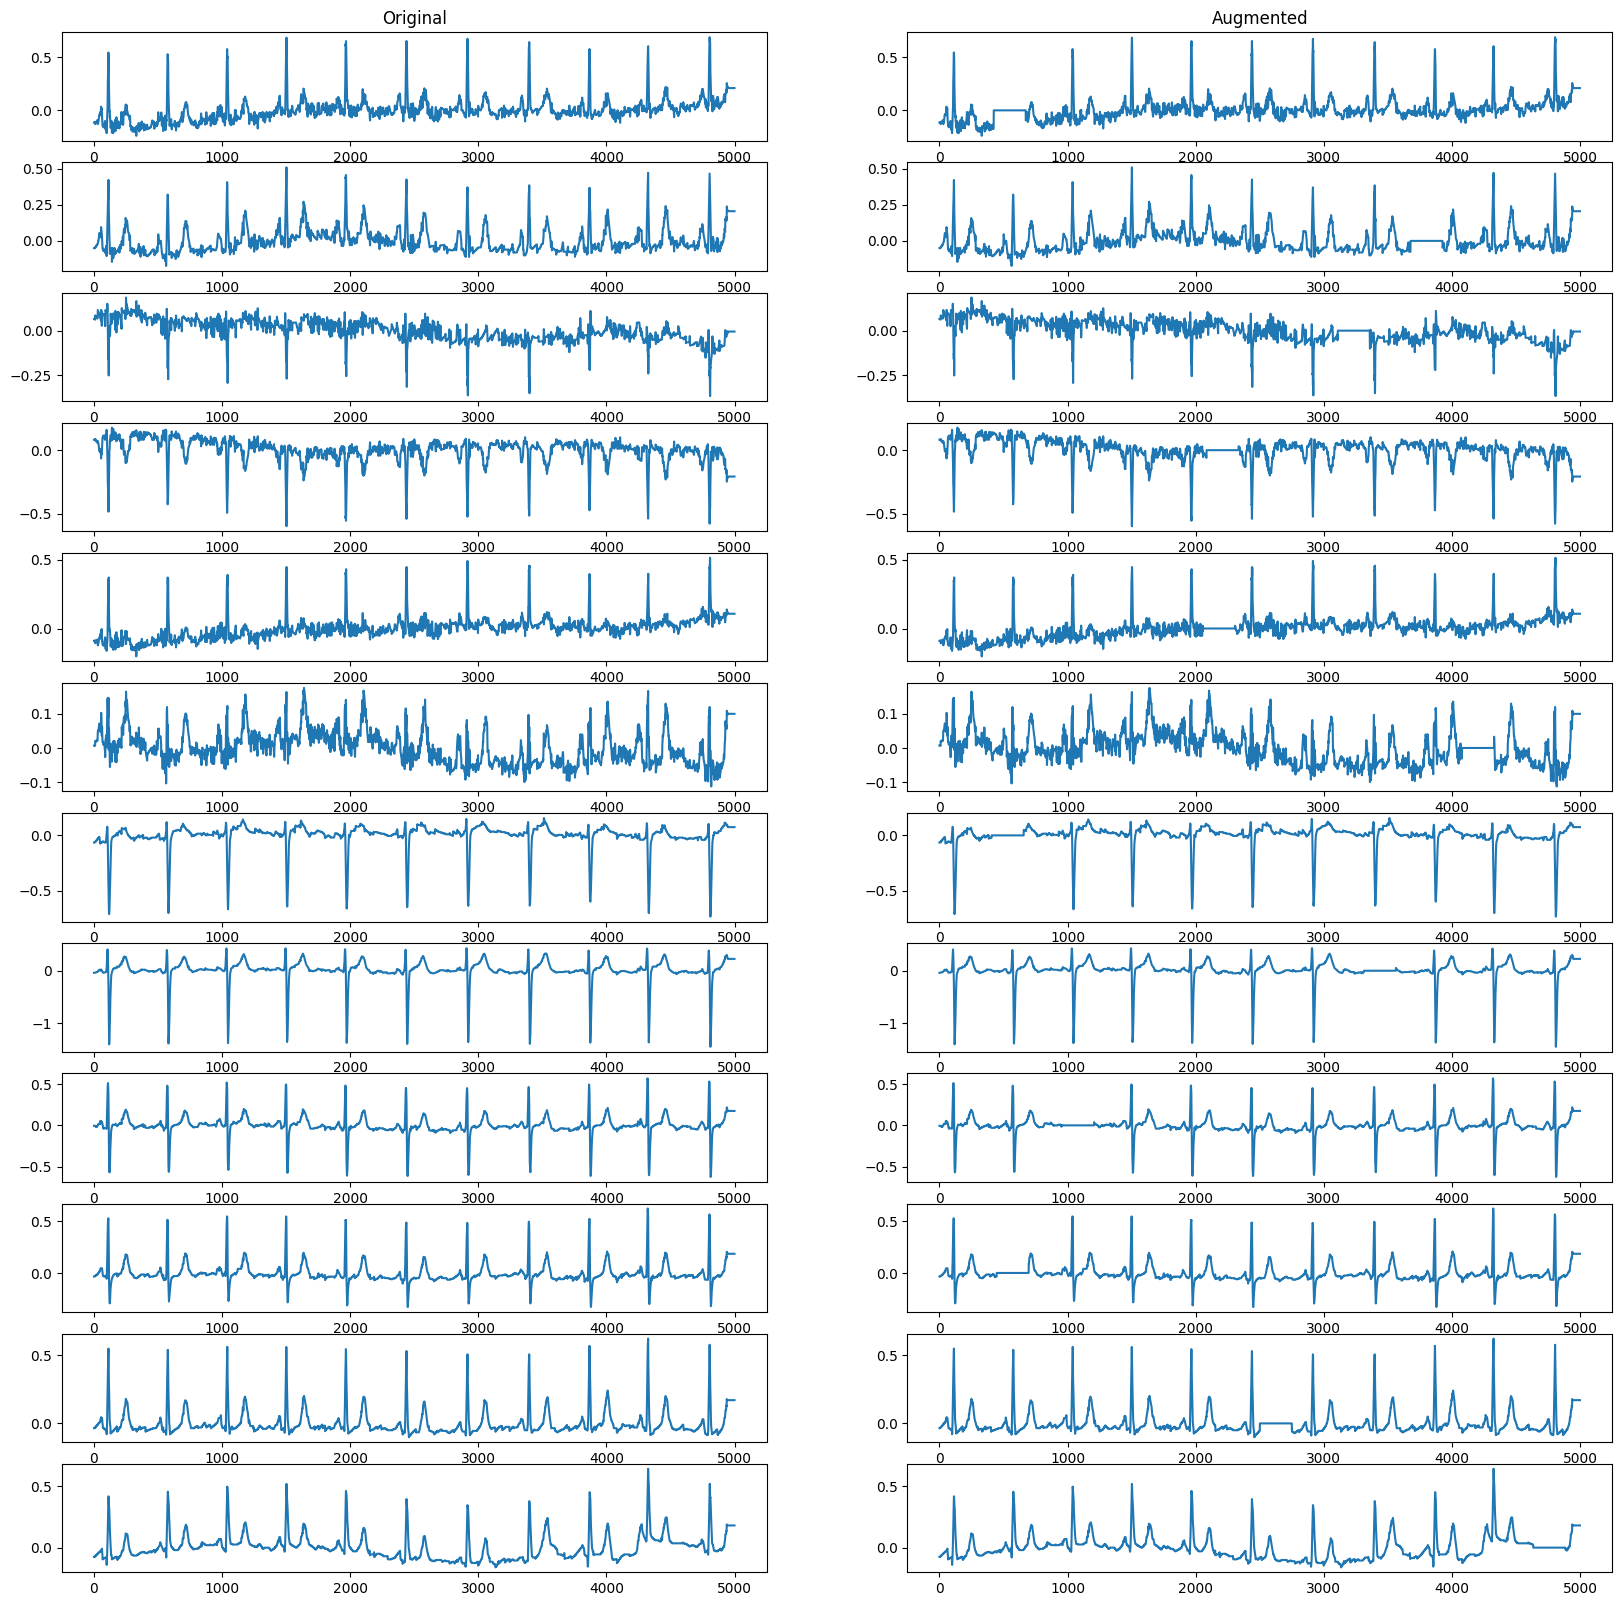

In [10]:
X_augmented = RandomMasking(duration=250, value=0, seed=seed)(X_sample)
plot_ecg_augmentation(X_sample, X_augmented)

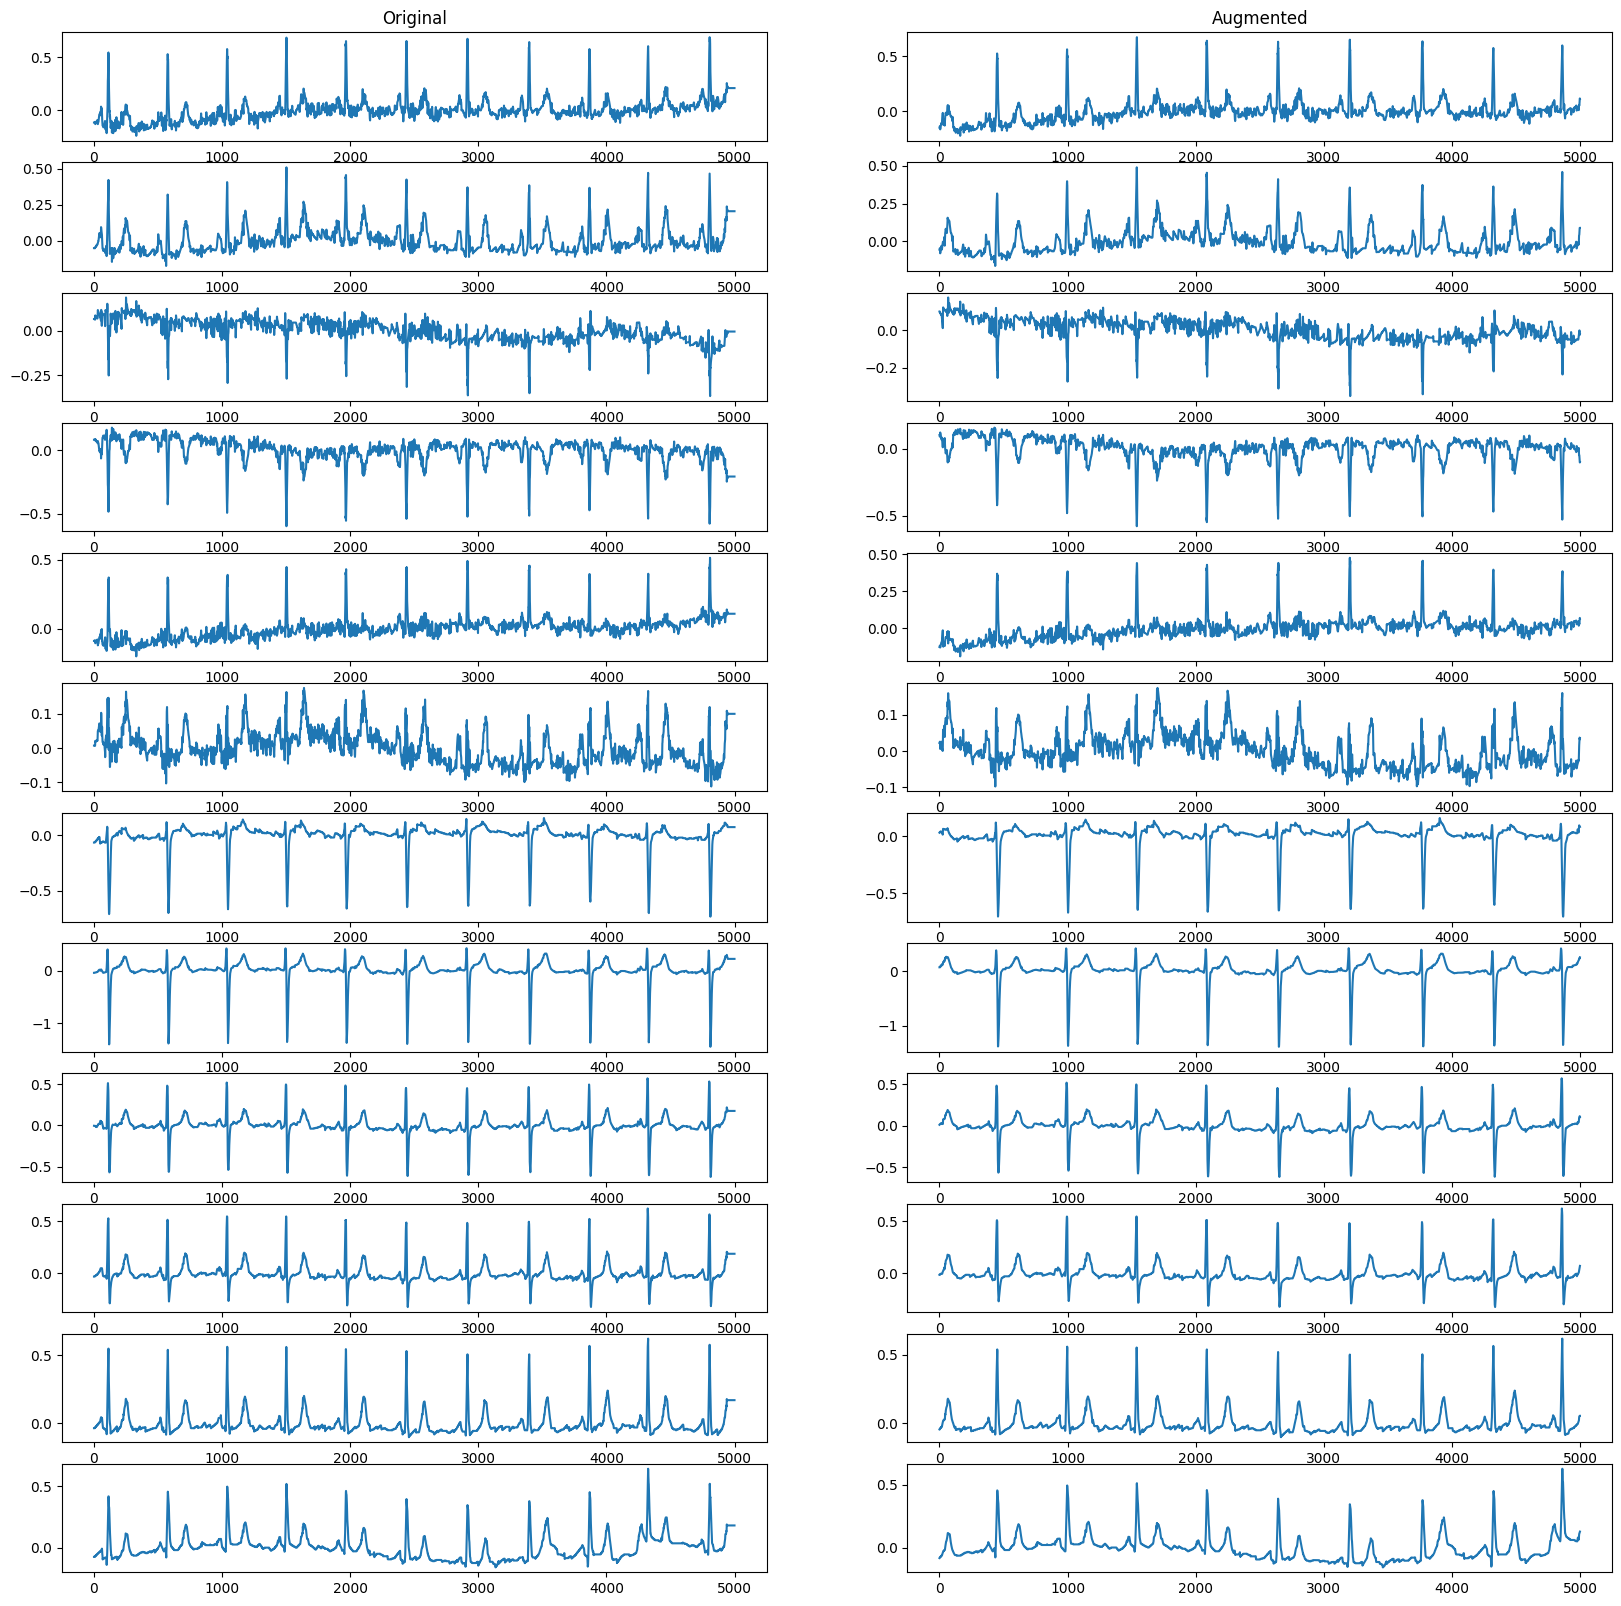

In [11]:
X_augmented = TimeWarp(warp_ratio=0.85)(X_sample)
plot_ecg_augmentation(X_sample, X_augmented)

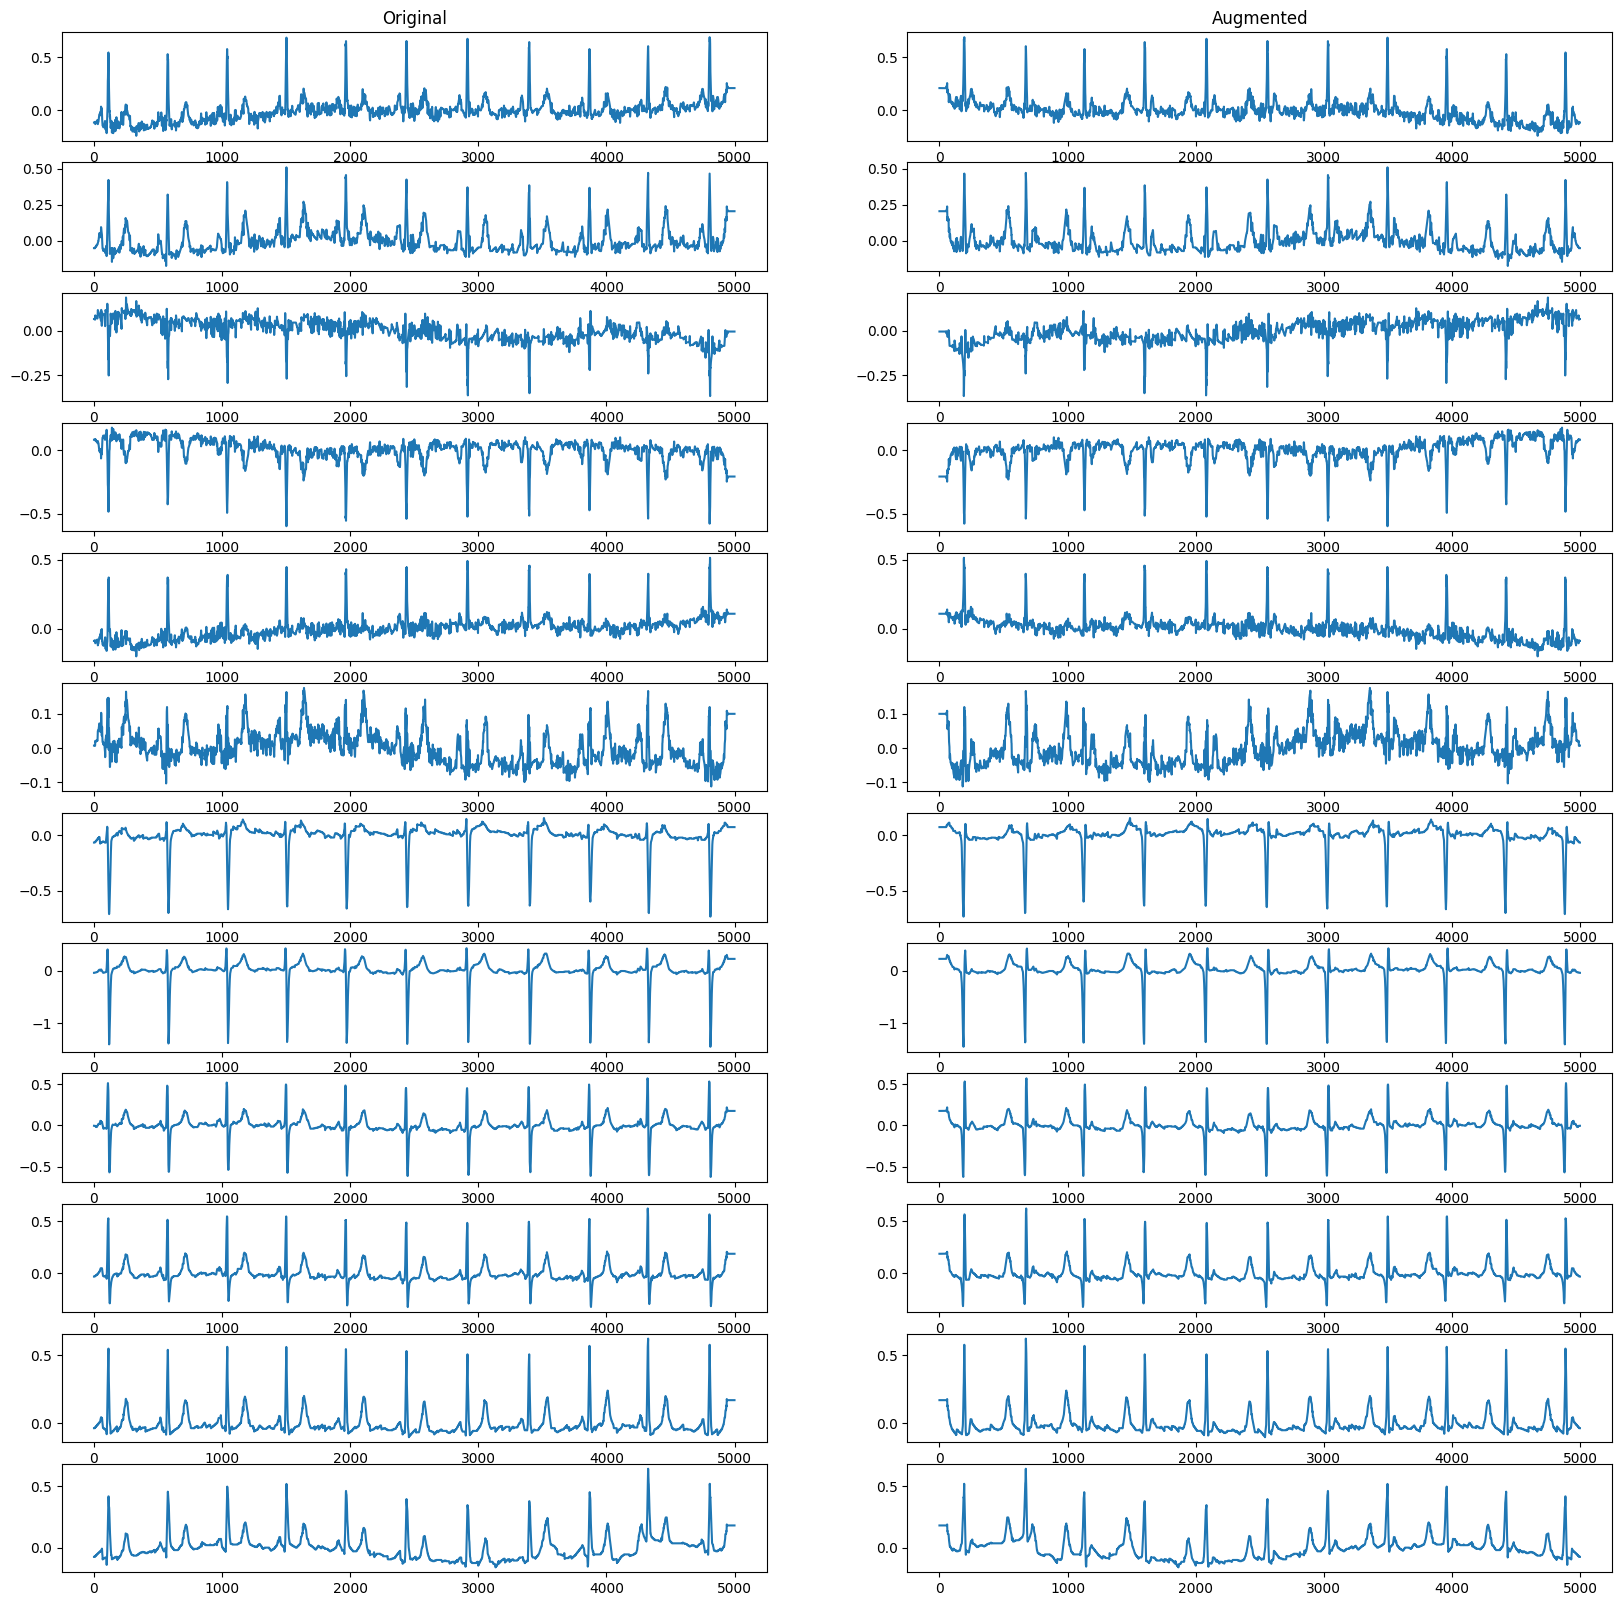

In [12]:
X_augmented = TimeInversion()(X_sample)
plot_ecg_augmentation(X_sample, X_augmented)

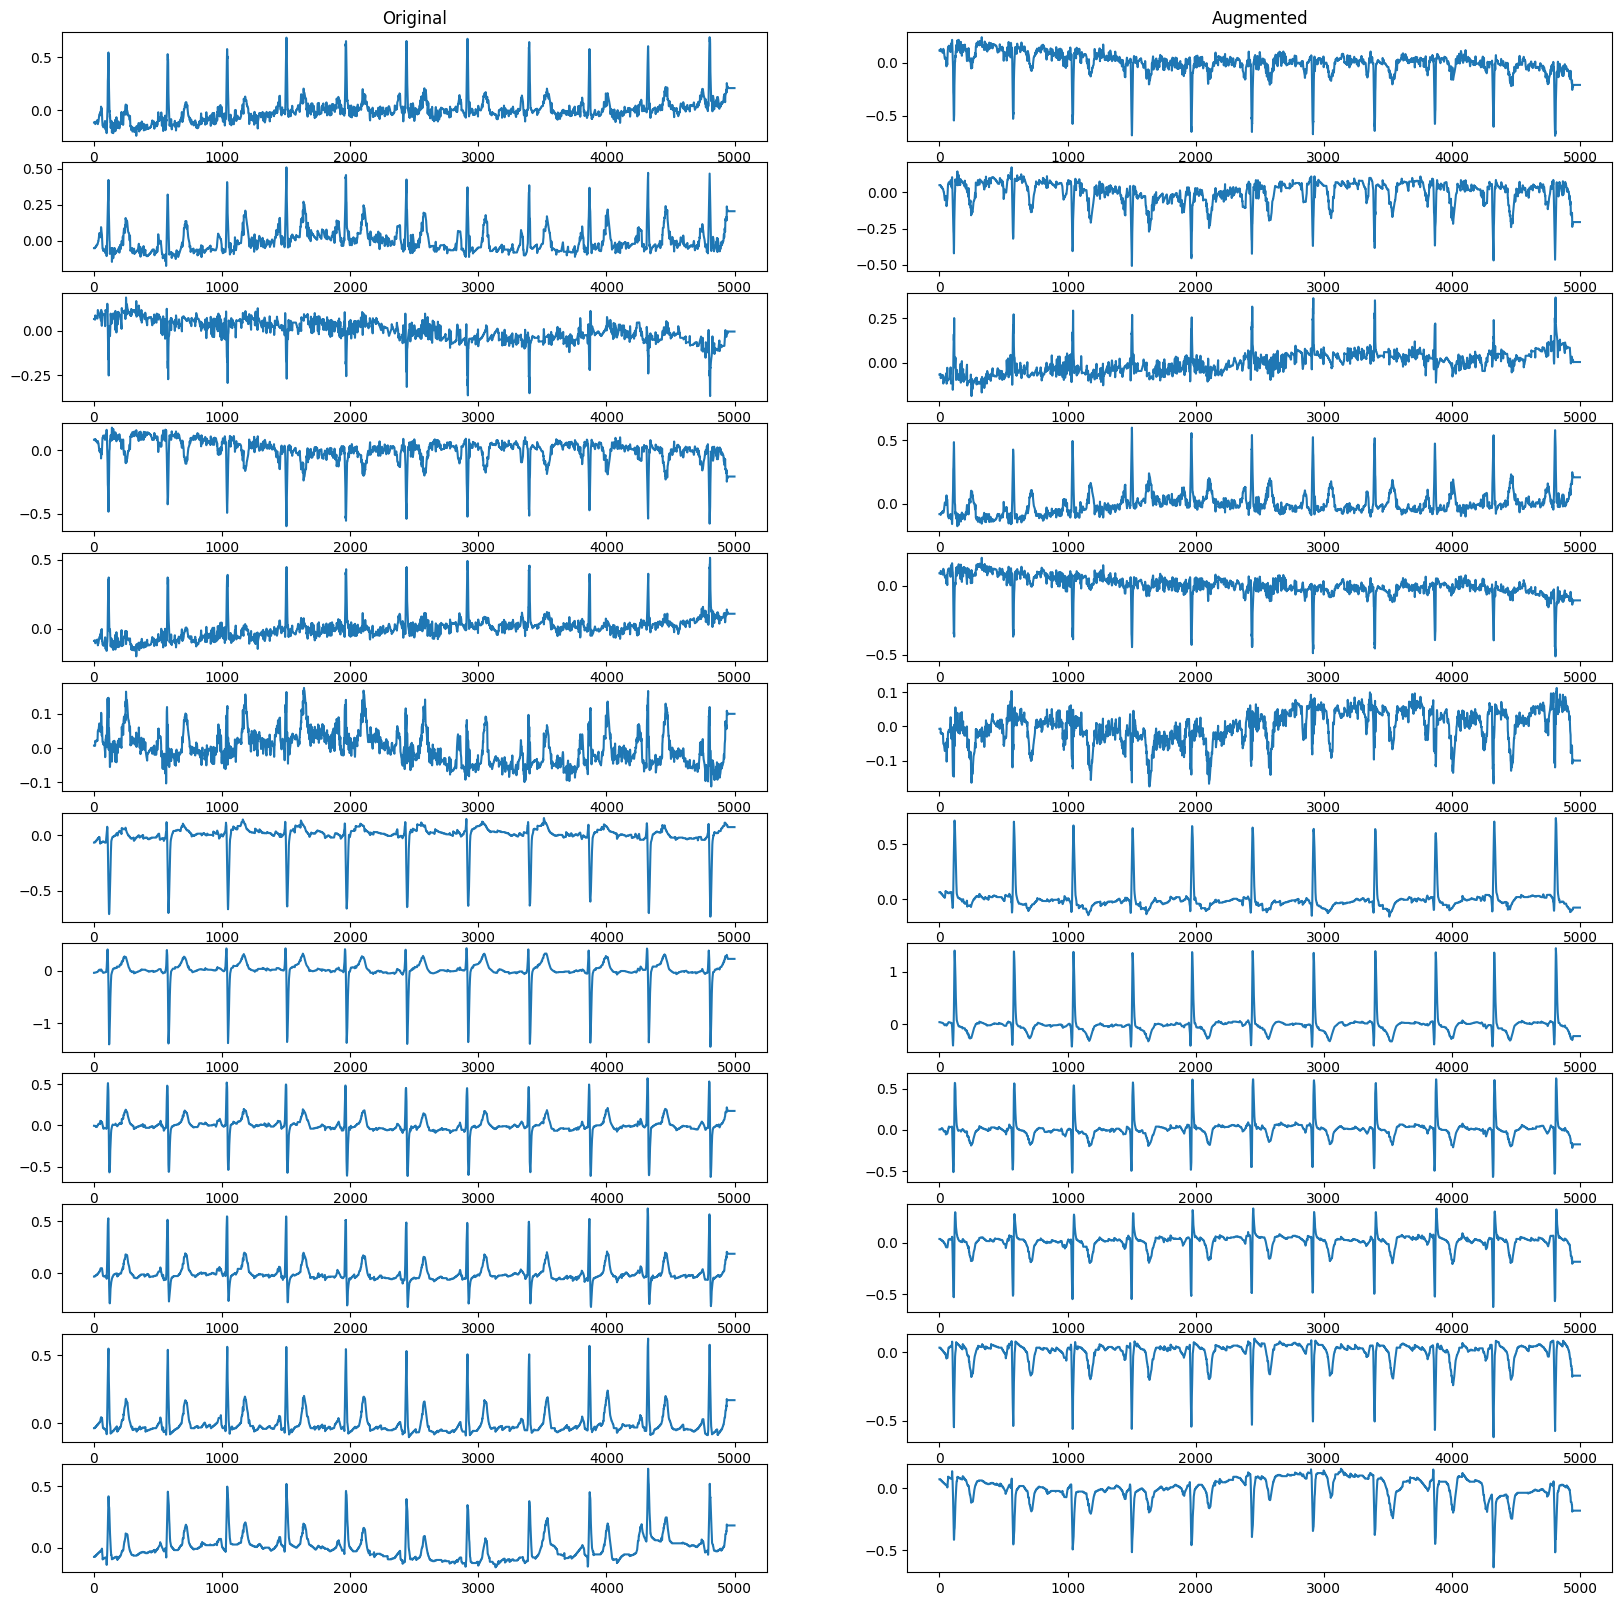

In [13]:
X_augmented = Inversion()(X_sample)
plot_ecg_augmentation(X_sample, X_augmented)